In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Waters and Lange calibratin datat

In [3]:
Cali=pt.return_cali_dataset(model="Waters2015")
Cali
CalcWL_cali=pt.calculate_fspar_liq_hygr(XAn=Cali['XAn'], XAb=Cali['XAb'], T=pd.Series(Cali['T\n(°C)']+0.00001+273.15),
                                        liq_comps=Cali, equationH="H_Waters2015", P=Cali['P\n(bars)']/1000)

In [16]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_Norm100Anhydrs.xlsx', sheet_name='Plag-Liq')
myPlags1=out['Plags']
myLiquids1=out['Liqs']
Plag_Glass=out['my_input']
notinLEPR= Plag_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(Plag_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Plag_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
InWaters=((Plag_Glass['Citation_x'].str.contains('Berndt2005_notinLEPR'))|
(Plag_Glass['Citation_x'].str.contains('Rader2013_notinLEPR'))|
(Plag_Glass['Citation_x'].str.contains('Rader2013_notinLEPR'))|
(Plag_Glass['Citation_x'].str.contains('Parmon2011_notinLEPR'))|
(Plag_Glass['Citation_x'].str.contains('Costa2004_notinLEPR'))|
(Plag_Glass['Citation_x'].str.contains('Waters2020_notinLEPR'))
)
newMask=notinLEPR|notinKeith
newMask=newMask.fillna(False)

mask_1GPa=Plag_Glass['P_kbar_x']<20
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask&(~InWaters)
Press_new=Press_new.fillna(False)

Eq_tests=pt.calculate_plag_liq_eq_tests(liq_comps=myLiquids1, plag_comps=myPlags1, P=Plag_Glass['P_kbar_x'], T=Plag_Glass['T_K_x'])
# Keith suggests best equilibrium test is Observed Kd (Ab-An)
Eq_Mask=Plag_Glass['T_K_x']>0
xT=Plag_Glass['T_K_x'].loc[Press_new&Eq_Mask]
xH=Plag_Glass['H2O_Liq'].loc[Press_new&Eq_Mask]

x=Plag_Glass['P_kbar_x'].loc[Press_new&Eq_Mask]

#Filt=Press_new&Eq_Mask

C:\Users\penny\AppData\Local\Temp\ipykernel_3464\4255604774.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(Plag_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Plag_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))


## sorting by water amounts

In [17]:
Test_input_All=out['my_input']
VBD_cal_mask=Test_input_All['H2O_Liq_Method'].str.contains('VBD_GSC')
VBD_cal_mask=VBD_cal_mask.fillna(False)

VBD_mask=Test_input_All['H2O_Liq_Method'].str.contains('VBD')
VBD_mask=VBD_mask.fillna(False)
FTIR_mask=Test_input_All['H2O_Liq_Method'].str.contains('FTIR')
FTIR_mask=FTIR_mask.fillna(False)
SIMS_mask=Test_input_All['H2O_Liq_Method'].str.contains('SIMS')
SIMS_mask=SIMS_mask.fillna(False)
Raman_mask=Test_input_All['H2O_Liq_Method'].str.contains('Raman')
Raman_mask=Raman_mask.fillna(False)
Sol_mask=Test_input_All['H2O_Liq_Method'].str.contains('Sol')
Sol_mask=Sol_mask.fillna(False)
balance_mask=Test_input_All['H2O_Liq_Method'].str.contains('balance')
balance_mask=balance_mask.fillna(False)

added_mask=Test_input_All['H2O_Liq_Method'].str.contains('added')
added_mask=added_mask.fillna(False)
Quantmethod1=FTIR_mask|SIMS_mask|Raman_mask

nonzero=Test_input_All['H2O_Liq']>0
NonQuantmethod=(VBD_mask&~VBD_cal_mask)|balance_mask|added_mask
NoH2O=Test_input_All['H2O_Liq_Method']==0
NoH2O=NoH2O.fillna(False)

Quantmethod=(VBD_cal_mask|Sol_mask|FTIR_mask|SIMS_mask|Raman_mask)&nonzero


In [18]:
Test_input_All['Citation_x'].loc[Sol_mask].unique()

array(['Kraw2013_notinLEPR', 'Mandler2013_notinLEPR',
       'Costa2004_notinLEPR', 'Andujar2015_notinLEPR',
       'Waters2020_notinLEPR', 'Marxer2022_notinLEPR',
       'Nakatani2022_notinLEPR', 'Solaro2019_notinLEPR'], dtype=object)

## How many do different measurement techniques

In [19]:
total_len=sum(Press_new)
print('Truly quantiative methods')
print(sum(Quantmethod1&Press_new)/total_len)
print('New ones doing FTIR')
print(sum(FTIR_mask&Press_new)/total_len)
print('New ones doing SIMS')
print(sum(SIMS_mask&Press_new)/total_len)
print('New ones doing Raman')
print(sum(Raman_mask&Press_new)/total_len)
print('Ones using solubility models')
print(sum(Sol_mask&Press_new)/total_len)
print('VBD method calibrated')
print(sum(VBD_cal_mask&Press_new)/total_len)
print('VBD method not calibrated')
print(sum(VBD_mask&Press_new)/total_len-sum(VBD_cal_mask&Press_new)/total_len)



Truly quantiative methods
0.43201754385964913
New ones doing FTIR
0.3333333333333333
New ones doing SIMS
0.05043859649122807
New ones doing Raman
0.04824561403508772
Ones using solubility models
0.17105263157894737
VBD method calibrated
0.16228070175438597
VBD method not calibrated
0.19517543859649122


In [20]:
sum(Press_new)

456

In [21]:
Quantmethod

0      False
1      False
2      False
3      False
4      False
       ...  
834     True
835     True
836     True
837     True
838     True
Length: 839, dtype: bool

In [22]:
Press_new

0      False
1      False
2      False
3      False
4      False
       ...  
834     True
835     True
836     True
837     True
838     True
Length: 839, dtype: bool

## If we known temperature

In [23]:
Calc_Global=pt.calculate_fspar_liq_hygr(liq_comps=myLiquids1, plag_comps=myPlags1, 
        equationH="H_Waters2015",  T=Plag_Glass['T_K_x'],
                                       P=Plag_Glass['P_kbar_x'])

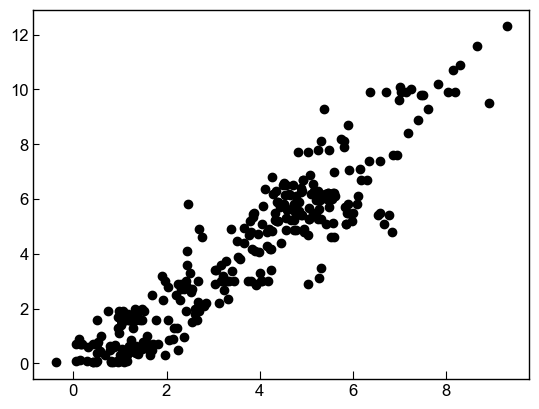

In [24]:
plt.plot(Calc_Global['H2O_calc'].loc[Quantmethod&Press_new], 
         Plag_Glass['H2O_Liq'].loc[Quantmethod&Press_new], 'ok')

## IF we have to iterate temperature

In [25]:
Calc_Global_It=pt.calculate_fspar_liq_temp_hygr(liq_comps=myLiquids1, plag_comps=myPlags1, 
        equationH="H_Waters2015",  equationT="T_Put2008_eq24a",
                                       P=Plag_Glass['P_kbar_x'])
pltiter=Calc_Global_It['T_H_calc']

20


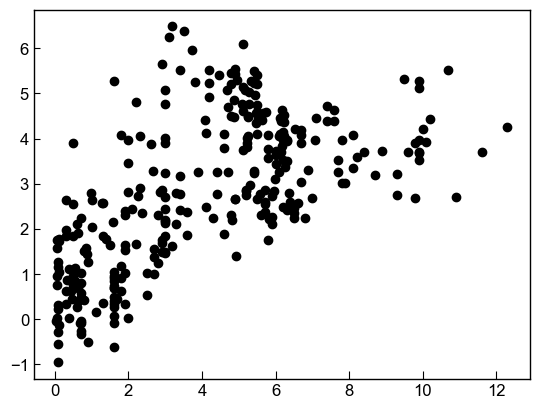

In [26]:
plt.plot( 
         Plag_Glass['H2O_Liq'].loc[Quantmethod&Press_new],
    pltiter['H2O_calc'].loc[Quantmethod&Press_new],'ok')

## Summary statistical figure

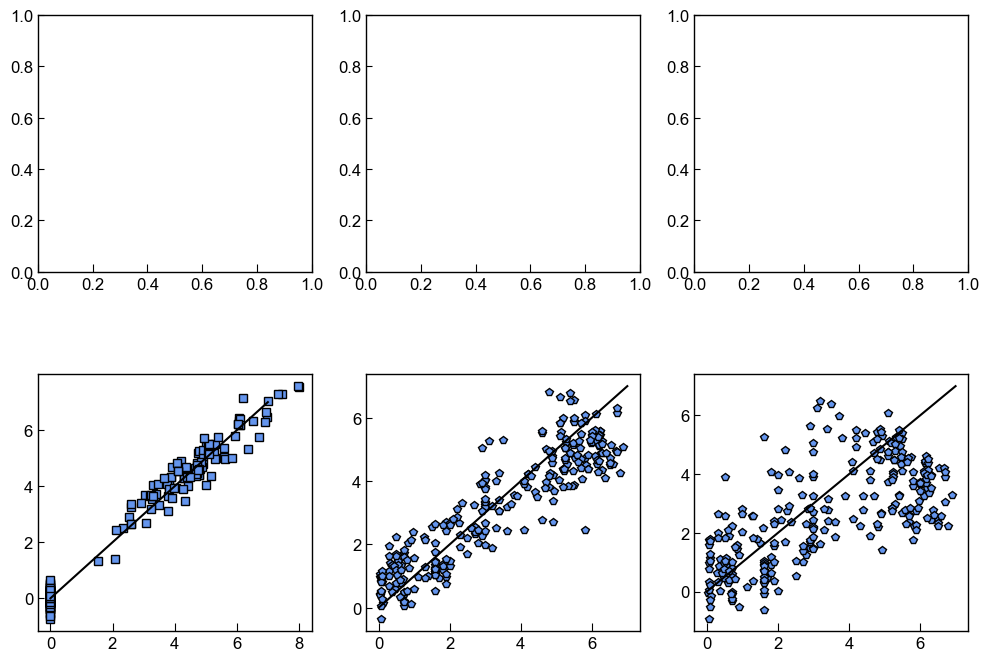

In [27]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2,3, figsize = (12,8)) # adjust dimensions of figure here

maxH2O=Plag_Glass['H2O_Liq']<7 #np.max(Cali['H2O_Liq'])
#### Assesing calibration. 
ax3.plot( Cali['H2O_Liq'],CalcWL_cali['H2O_calc'], 'sk', mfc='cornflowerblue')
ax4.plot(Plag_Glass['H2O_Liq'].loc[Quantmethod&Press_new&maxH2O], 
         Calc_Global['H2O_calc'].loc[Quantmethod&Press_new&maxH2O], 
         'pk', mfc='cornflowerblue')

ax5.plot( 
         Plag_Glass['H2O_Liq'].loc[Quantmethod&Press_new&maxH2O],
    pltiter['H2O_calc'].loc[Quantmethod&Press_new&maxH2O],'pk', mfc='cornflowerblue')
ax3.plot([0, 7], [0, 7], '-k')
ax4.plot([0, 7], [0, 7], '-k')
ax5.plot([0, 7], [0, 7], '-k')

plt.subplots_adjust(wspace=0.2, hspace=0.4)
fig.savefig('HYgroStatitics.png', dpi=200)

In [29]:
pt.calculate_R2(Cali['H2O_Liq'],CalcWL_cali['H2O_calc'],
                xy=False)

{'R2': '0.98',
 'RMSE': '0.35',
 'RMSE_num': 0.34688,
 'P_val': '0.000',
 'Median': '0.03',
 'Mean': '0.02',
 'Int': array([0.05104115]),
 'Grad': array([0.98757014])}

In [30]:
pt.calculate_R2(Plag_Glass['H2O_Liq'].loc[Quantmethod&Press_new&maxH2O], 
         pltiter['H2O_calc'].loc[Quantmethod&Press_new&maxH2O],
                xy=False)

{'R2': '0.45',
 'RMSE': '1.77',
 'RMSE_num': 1.76688,
 'P_val': '0.000',
 'Median': '-0.73',
 'Mean': '-0.70',
 'Int': array([0.9067158]),
 'Grad': array([0.52347947])}

In [31]:
pt.calculate_R2(Plag_Glass['H2O_Liq'].loc[Quantmethod&Press_new&maxH2O], 
         Calc_Global['H2O_calc'].loc[Quantmethod&Press_new&maxH2O],
                xy=False)

{'R2': '0.82',
 'RMSE': '0.94',
 'RMSE_num': 0.945,
 'P_val': '0.000',
 'Median': '-0.28',
 'Mean': '-0.18',
 'Int': array([0.62496404]),
 'Grad': array([0.76018991])}